# Vodní díla v Jihomoravském kraji

In [4]:
###
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx

Vytvoříme databázový dotaz na všechu vodu, která je umělá nádrž nebo jezero.  S tvorbou dotazu nám pomůže dokumentace OpenStreetMaps, která pro ČR obsahuje i Registr územní identifikace, adres a nemovitostí [RUIAN](https://wiki.openstreetmap.org/wiki/Cs:R%C3%9AIAN#Parcely)

`(water=reservoir or water=lake) in "Jihomoravský kraj"`

Tento dotaz vložíme do průvodce na [OverPass](http://overpass-turbo.eu/) a vytvoří se dotaz v jazyce **Overpass**.

```overpass
/*
This has been generated by the overpass-turbo wizard.
The original search was:
“(water=reservoir or water=lake) in "Jihomoravský kraj"”
*/
[out:json][timeout:25];
// fetch area “Jihomoravský kraj” to search in
{{geocodeArea:Jihomoravský kraj}}->.searchArea;
// gather results
(
  // query part for: “water=reservoir”
  node["water"="reservoir"](area.searchArea);
  way["water"="reservoir"](area.searchArea);
  relation["water"="reservoir"](area.searchArea);
  // query part for: “water=lake”
  node["water"="lake"](area.searchArea);
  way["water"="lake"](area.searchArea);
  relation["water"="lake"](area.searchArea);
);
// print results
out body;
>;
out skel qt;
```

Na závěr exportujeme do souboru *voda.geojson*.

In [5]:
###
df = geopandas.read_file("voda.geojson")
df.head()

,id,@id,FACC_CODE,access,alt_name,alt_name:de,barrier,boat,building,building:ruian:type,...,sport,start_date,status,swimming,tidal,type,water,wikidata,wikipedia,geometry
0,relation/69470,relation/69470,None,None,None,None,None,None,None,None,...,None,None,None,None,None,multipolygon,reservoir,None,None,"POLYGON ((16.92895 48.73802, 16.92906 48.73807..."
1,relation/417920,relation/417920,None,None,Vranovská přehrada,None,None,None,None,None,...,None,None,None,None,None,multipolygon,reservoir,Q2534979,cs:Vodní nádrž Vranov,"POLYGON ((15.72030 48.93241, 15.72038 48.93232..."
2,relation/567216,relation/567216,None,None,None,None,None,None,None,None,...,None,None,None,None,None,multipolygon,reservoir,None,None,"POLYGON ((16.75728 49.18673, 16.75713 49.18680..."
3,relation/1387463,relation/1387463,None,None,None,None,None,None,None,None,...,None,None,None,None,None,multipolygon,reservoir,None,None,"POLYGON ((16.72397 49.11570, 16.72382 49.11559..."
4,relation/1463374,relation/1463374,None,None,None,None,None,None,None,None,...,None,None,None,None,None,multipolygon,reservoir,None,None,"POLYGON ((16.85663 48.91824, 16.85667 48.91828..."


In [6]:
# Konvertujeme dataframe do Krovakova zobrazení (epsg:5514), abychom mohli spočítat plochy
df = df.to_crs("epsg:5514")
df.crs ###

<Derived Projected CRS: EPSG:5514>
Name: S-JTSK / Krovak East North
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Czechia; Slovakia.
- bounds: (12.09, 47.73, 22.56, 51.06)
Coordinate Operation:
- name: Krovak East North (Greenwich)
- method: Krovak (North Orientated)
Datum: System of the Unified Trigonometrical Cadastral Network
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

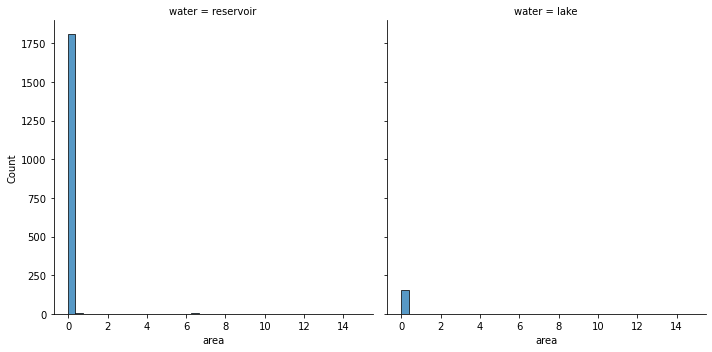

In [7]:
# vytvoříme sloupec plochy v km2
df["area"] = df.area / 1_000_000
# a vytvoříme také označení, že se jedná o velku plochu, pokud plocha > 1km2
df["large"] = df["area"] > 1
sns.displot(data=df, x="area", col="water", bins=40)

In [8]:
# Podíváme se na 10 největších vodních děl
df.sort_values("area").tail(10)

,id,@id,FACC_CODE,access,alt_name,alt_name:de,barrier,boat,building,building:ruian:type,...,status,swimming,tidal,type,water,wikidata,wikipedia,geometry,area,large
1890,way/502090190,way/502090190,None,None,None,None,None,None,None,None,...,None,None,None,None,reservoir,Q14970374,cs:Vodní nádrž Znojmo,"POLYGON ((-643746.827 -1193827.223, -643742.38...",0.462512,False
1427,way/51045309,way/51045309,None,None,None,None,None,None,None,None,...,None,None,None,None,reservoir,Q11922900,None,"POLYGON ((-588207.882 -1128222.199, -588200.78...",0.509352,False
1898,way/519419861,way/519419861,None,None,None,None,None,None,None,None,...,None,None,None,None,reservoir,None,None,"POLYGON ((-637613.380 -1186027.891, -637618.16...",0.520021,False
1701,way/55982722,way/55982722,None,None,None,None,None,None,None,None,...,None,None,None,None,reservoir,Q2390923,cs:Vodní nádrž Opatovice,"POLYGON ((-573443.508 -1150633.170, -573484.23...",0.663155,False
13,relation/7506384,relation/7506384,None,None,None,None,None,None,None,None,...,None,None,None,multipolygon,reservoir,Q2390883,None,"POLYGON ((-600851.801 -1119003.713, -600865.44...",0.978394,False
19,relation/13273888,relation/13273888,None,None,Prygl,None,None,None,None,None,...,None,None,None,multipolygon,reservoir,Q46504,cs:Brněnská přehrada,"POLYGON ((-607537.156 -1152357.756, -607474.93...",1.979177,True
12,relation/6803810,relation/6803810,BH080,None,vodní nádrž Nové Mlýny I,Stausee Neumühl I,None,None,None,None,...,None,None,None,multipolygon,reservoir,Q12039056,None,"POLYGON ((-606869.531 -1194655.802, -606844.69...",6.437615,True
1,relation/417920,relation/417920,None,None,Vranovská přehrada,None,None,None,None,None,...,None,None,None,multipolygon,reservoir,Q2534979,cs:Vodní nádrž Vranov,"POLYGON ((-665920.639 -1182426.221, -665915.84...",6.455288,True
11,relation/6803809,relation/6803809,BH080,None,vodní nádrž Nové Mlýny II,Stausee Neumühl II,None,None,None,None,...,None,None,None,multipolygon,reservoir,Q7945005,cs:Novomlýnská nádrž,"POLYGON ((-603161.736 -1193904.576, -603143.41...",9.264772,True
1568,way/51264639,way/51264639,None,None,vodní nádrž Nové Mlýny III,Stausee Neumühl III,None,None,None,None,...,None,None,None,None,reservoir,Q12041132,cs:Novomlýnská nádrž,"POLYGON ((-596204.722 -1193409.535, -596220.45...",14.740670,True


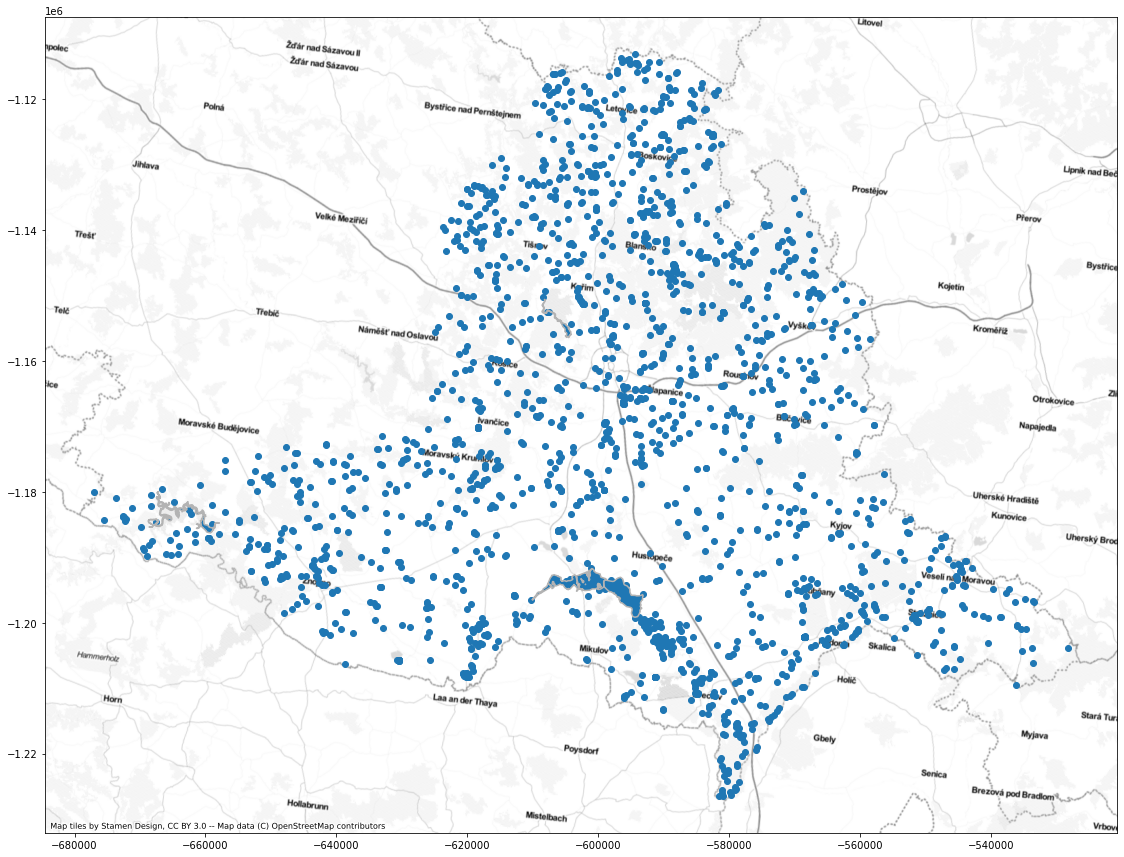

In [9]:
# vykreslíme mapu
fig, ax = plt.subplots(1, 1, figsize=(20, 15)) ###
# velkých
df[df["large"]].plot(ax=ax)
#zvýrazníme hranice
df[df["large"]].boundary.plot(ax=ax, color="0.7")
# a malé také zobrazíme zobrazíme. Jsou vidět?
df[~df["large"]].centroid.plot(ax=ax)

# přidáme basemapu (nezapomenout na crs a zdroj ctx.providers.Stamen.TonerLite)
ctx.add_basemap(ax, crs=df.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

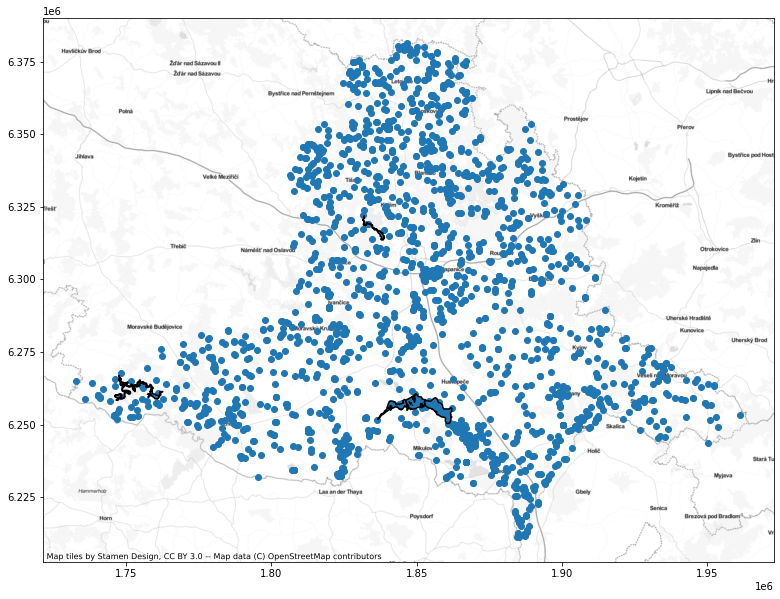

In [10]:
###
# Popisky jsou rozmazané. Proto vytvoříme dataframe df2, které má CRS WGS84 (epsg:3857)
df2 = df.to_crs("epsg:3857")
fig, ax = plt.subplots(1, 1, figsize=(20, 10)) 
df2[df["large"]].plot(ax=ax)
df2[df["large"]].boundary.plot(ax=ax, color="k")
df2[~df["large"]].centroid.plot(ax=ax)

ctx.add_basemap(ax, crs=df2.crs.to_string(), source=ctx.providers.Stamen.TonerLite, zoom=10, alpha=0.9)